# Project Introduction
This project explores the data from UCI Machien Learning posted up on Kaggle. 

In [1]:
# Imports 
%matplotlib inline

# General Python libraries
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import time

# Feature Extraction & Unsupervised Libraries
from sklearn.feature_extraction.text import *
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

from matplotlib.colors import LogNorm

# Learning/Model Libraries
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
# Add trees libraries

# Evaluation Libarires
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

## Data Processing

In [2]:
# Read in the raw data, process and save into different folder
RAWDATA_PATH = '../data/raw/UCIHumanActivity/'
df_rtrain = pd.read_csv(f'{RAWDATA_PATH}train.csv')
df_rtest = pd.read_csv(f'{RAWDATA_PATH}test.csv')
df_rtrain.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [3]:
print(df_rtrain.shape)
print(df_rtrain.dtypes[:5])

(7352, 563)
tBodyAcc-mean()-X    float64
tBodyAcc-mean()-Y    float64
tBodyAcc-mean()-Z    float64
tBodyAcc-std()-X     float64
tBodyAcc-std()-Y     float64
dtype: object


## Observations on Training Data
* There are 7352 examples in the training set
* There are 563 columns 
* Activity, the last column, is the label (Y) 
* The subject is identified by a number
* All other columns are float64 datatypes

## Next Steps
* Some histograms
    * On activities
    * On the subject
* Separate out X and Y (features and labels) as well as the participants
* Consider filtering now to the original, raw features since 563 is A LOT of features 
* Consider creating a validation set

In [4]:
print('Activity Counts: ')
df_rtrain['Activity'].value_counts()

Activity Counts: 


LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [5]:
print('Participant Counts: ')
df_rtrain['subject'].value_counts()
# 22 participants included with 281 to 409 measurements

Participant Counts: 


25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

## Testing Feature Reduction w/ KMeans Clustering

In [6]:
pca1 = PCA(1)
pca1_features = pca1.fit_transform(df_rtrain.loc[:, df_rtrain.drop(["subject", "Activity"], axis=1).columns])
pca1.explained_variance_ratio_

array([0.6255444])

(array([3.380e+03, 6.040e+02, 7.500e+01, 3.540e+02, 1.444e+03, 1.158e+03,
        2.570e+02, 5.800e+01, 1.900e+01, 3.000e+00]),
 array([-6.63471232, -4.05025145, -1.46579058,  1.11867029,  3.70313116,
         6.28759204,  8.87205291, 11.45651378, 14.04097465, 16.62543552,
        19.20989639]),
 <a list of 10 Patch objects>)

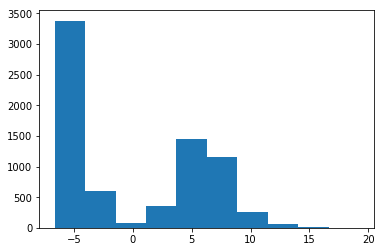

In [7]:
plt.hist(pca1_features)

In [8]:
m1 = KMeans(n_clusters = 2, n_jobs=-1)
m1.fit(pca1_features)
prediction = m1.predict(pca1_features)

In [9]:
result = pd.DataFrame({"Prediction": prediction, "Activity": df_rtrain["Activity"],
                       "Count":[1 for i in range(len(prediction))]})

In [10]:
pd.pivot_table(index = "Activity", columns = "Prediction", values = "Count",
               aggfunc = "count", data = result, fill_value = 0)

Prediction,0,1
Activity,,
LAYING,1396,11
SITTING,1285,1
STANDING,1374,0
WALKING,0,1226
WALKING_DOWNSTAIRS,0,986
WALKING_UPSTAIRS,0,1073


Single feature PCA w/ 2 cluster KMeans can achieve 99.84% accuracy differentiating between Dynamic and Static activities. Model is not overfit due to testing on training data - training labels were not used in the unsupervised kmeans algorithm. Potentially useful as a first stage in an ensemble model.

## KNN Testing

In [42]:
# annotate dynamic and static data and separate data
df_rtrain["Static"] = df_rtrain["Activity"].isin(["SITTING", "LAYING", "STANDING"])
df_rtest["Static"] = df_rtest["Activity"].isin(["SITTING", "LAYING", "STANDING"])

X_train = df_rtrain.loc[:, df_rtrain.drop(["subject", "Activity", "Static"], axis=1).columns]
y_train = df_rtrain["Activity"]
X_test = df_rtest.loc[:, df_rtest.drop(["subject", "Activity", "Static"], axis=1).columns]
y_test = df_rtest["Activity"]


X_static_train = df_rtrain.loc[df_rtrain["Static"]==True, df_rtrain.drop(["subject", "Activity", "Static"], axis=1).columns]
y_static_train = df_rtrain["Activity"][df_rtrain["Static"]==True]
X_static_test = df_rtest.loc[df_rtest["Static"]==True, df_rtest.drop(["subject", "Activity", "Static"], axis=1).columns]
y_static_test = df_rtest["Activity"][df_rtest["Static"]==True]

X_dynamic_train = df_rtrain.loc[df_rtrain["Static"]==False, df_rtrain.drop(["subject", "Activity", "Static"], axis=1).columns]
y_dynamic_train = df_rtrain["Activity"][df_rtrain["Static"]==False]
X_dynamic_test = df_rtest.loc[df_rtest["Static"]==False, df_rtest.drop(["subject", "Activity", "Static"], axis=1).columns]
y_dynamic_test = df_rtest["Activity"][df_rtest["Static"]==False]

### Static Path

Testing the default KNN parameters on train and test:

In [12]:
m2_static = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
m2_static.fit(X_static_train, y_static_train)
m2_static.score(X_static_test, y_static_test)

0.908974358974359

Use PCA to reduce feature space in order to more quickly run gridsearch. 100 features gives near 100% variance.

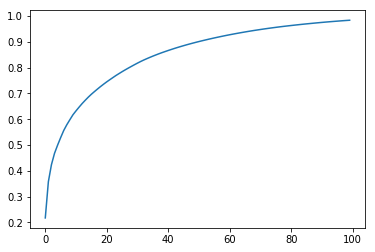

In [29]:
pca_static = PCA(100)
X_static_train_PCA_features = pca_static.fit_transform(X_static_train)
X_static_test_PCA_features = pca_static.transform(X_static_test)
plt.plot(np.cumsum(pca_static.explained_variance_ratio_))

Parameters for gridsearch. This has been rerun, narrowing the hyperparameter search space each iteration.

In [25]:
param_grid = {"n_neighbors":[14,16,18,20,22,24,26],
              "weights" : ["distance"],
              "algorithm":["auto"],
              "leaf_size":[5,6,7,8,9,10,11,12,13,14,15],
              "p":[1.5] }

In [26]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose = 2)
grid.fit(X_static_train_PCA_features, y_static_train)

Fitting 3 folds for each of 77 candidates, totalling 231 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 14.7min
[Parallel(n_jobs=-1)]: Done 231 out of 231 | elapsed: 22.4min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [14, 16, 18, 20, 22, 24, 26], 'weights': ['distance'], 'algorithm': ['auto'], 'leaf_size': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'p': [1.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=2)

In [27]:
print("Best Accuracy:", grid.best_score_)
print("Parameters:", grid.best_params_)

Best Accuracy: 0.8864027538726333
Parameters: {'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 22, 'p': 1.5, 'weights': 'distance'}


Rerunning the kNN with refined parameters on full train and test. Using full feature space here. Accuracy is improved ~3%.

In [31]:
m2_static_refined = KNeighborsClassifier(n_neighbors=22, leaf_size =5, weights = "distance", p = 1.5, n_jobs=-1)
m2_static_refined.fit(X_static_train, y_static_train)
m2_static_refined.score(X_static_test, y_static_test)

0.9301282051282052

### Dynamic Path

Running kNN for dynamic movements using best hyperparameters from static gridsearch results in ~90% accuracy.

In [36]:
m2_dynamic = KNeighborsClassifier(n_neighbors=22, leaf_size =5, weights = "distance", p = 1.5, n_jobs=-1)
m2_dynamic.fit(X_dynamic_train, y_dynamic_train)
m2_dynamic.score(X_dynamic_test, y_dynamic_test)

0.9005046863734679

Using PCA to reduce feature space to 100 components in order to rerun gridsearch for dynamic movements.

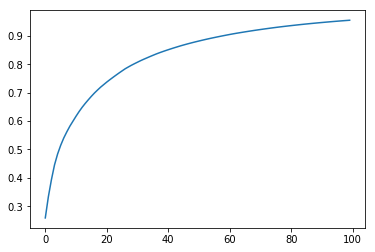

In [37]:
pca_dynamic = PCA(100)
X_dynamic_train_PCA_features = pca_dynamic.fit_transform(X_dynamic_train)
X_dynamic_test_PCA_features = pca_dynamic.transform(X_dynamic_test)
plt.plot(np.cumsum(pca_dynamic.explained_variance_ratio_))

In [39]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose = 2)
grid.fit(X_dynamic_train_PCA_features, y_dynamic_train)

Fitting 3 folds for each of 77 candidates, totalling 231 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done 231 out of 231 | elapsed: 14.5min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [14, 16, 18, 20, 22, 24, 26], 'weights': ['distance'], 'algorithm': ['auto'], 'leaf_size': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 'p': [1.5]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=2)

In [40]:
print("Best Accuracy:", grid.best_score_)
print("Parameters:", grid.best_params_)

Best Accuracy: 0.9168949771689497
Parameters: {'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 20, 'p': 1.5, 'weights': 'distance'}


Refined parameters results in negligible performance gain.

In [41]:
m2_dynamic_refined = KNeighborsClassifier(n_neighbors=20, leaf_size =5, weights = "distance", p = 1.5, n_jobs=-1)
m2_dynamic_refined.fit(X_dynamic_train, y_dynamic_train)
m2_dynamic_refined.score(X_dynamic_test, y_dynamic_test)

0.9019466474405191

## Testing single kNN for all classifications (dynamic and static) w/o feature reduction

In [43]:
param_grid = {"n_neighbors":[5,10,15,20,25,30,35],
              "weights" : ["distance", "uniform"],
              "algorithm":["auto"],
              "leaf_size":[10,20,30,40],
              "p":[1, 1.5, 2] }

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose = 2)
grid.fit(X_train, y_train)

print("Best Accuracy:", grid.best_score_)
print("Parameters:", grid.best_params_)

Fitting 3 folds for each of 168 candidates, totalling 504 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 58.7min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 142.5min
[Parallel(n_jobs=-1)]: Done 504 out of 504 | elapsed: 209.0min finished


Best Accuracy: 0.9056039173014145
Parameters: {'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}


In [44]:
m3_refined = KNeighborsClassifier(n_neighbors=20, leaf_size =10, weights = "uniform", p = 1, n_jobs=-1)
m3_refined.fit(X_train, y_train)
m3_refined.score(X_test, y_test)

0.9229725144214456

Splitting by static and then dynamic, followed by kNNs results in about 91.5% accuracy overall... simply running 1 massive kNN results in about 92.3% accuracy.